#### 1. Implement K-NN Classifier for classification of any dataset of your choice.
a. Load an existing data set

b. Split the data set to train and test sets

c. Test your model using test set. Find accuracy and confusion Matrix.

d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs accuracy” and find out the value of k for maximum accuracy for the test samples.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("adm_data.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Print column names
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [10]:
from sklearn.model_selection import train_test_split


predictors = df.drop("GRE Score", axis=1)
target = df["GRE Score"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.2, random_state=0)

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 320
Test set size: 80


In [5]:
X_train.shape

(320, 8)

In [6]:
X_train.shape

(320, 8)

In [7]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix

class KNNClassifier:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            distances = []
            for j in range(len(self.X_train)):
                distance = np.sum(X_test[i] != self.X_train[j])
                distances.append((distance, self.y_train[j]))
            distances.sort(key=lambda x: x[0])
            nearest_neighbors = distances[:self.k]
            neighbor_labels = [neighbor[1] for neighbor in nearest_neighbors]
            most_common_label = Counter(neighbor_labels).most_common(1)[0][0]
            predictions.append(most_common_label)
        return predictions

knn = KNNClassifier(k=3)

knn.fit(X_train.values, Y_train.values)

predictions = knn.predict(X_test.values)

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.0625
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


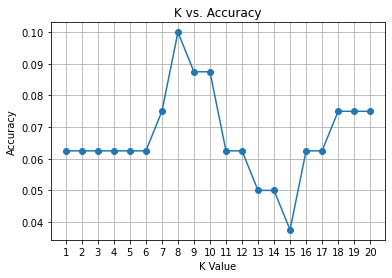

Maximum accuracy: 0.10 for K = 8


In [8]:
k_values = range(1, 21)  

accuracies = []

for k in k_values:
    knn = KNNClassifier(k)
    knn.fit(X_train.values, Y_train.values)
    predictions = knn.predict(X_test.values)
    acc = accuracy_score(Y_test, predictions)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K vs. Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

max_acc = max(accuracies)
best_k = k_values[accuracies.index(max_acc)]
print(f"Maximum accuracy: {max_acc:.2f} for K = {best_k}")